In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
sns.set_theme(style="whitegrid")
from scipy.spatial import distance

In [3]:
df = pd.read_csv('data.csv')
Person = 'Adam'

Beer Order

In [4]:
dictionary = {}
for i, b in enumerate(df['Name'].unique()):
    key = str(b) + '\n' + str(df.loc[df['Name'] == b]['Brewery'].values[0]) + '\n' + str(df.loc[df['Name'] == b][Person].values[0])
    dictionary[key] = df.loc[df['Name'] == b][Person].values[0]
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

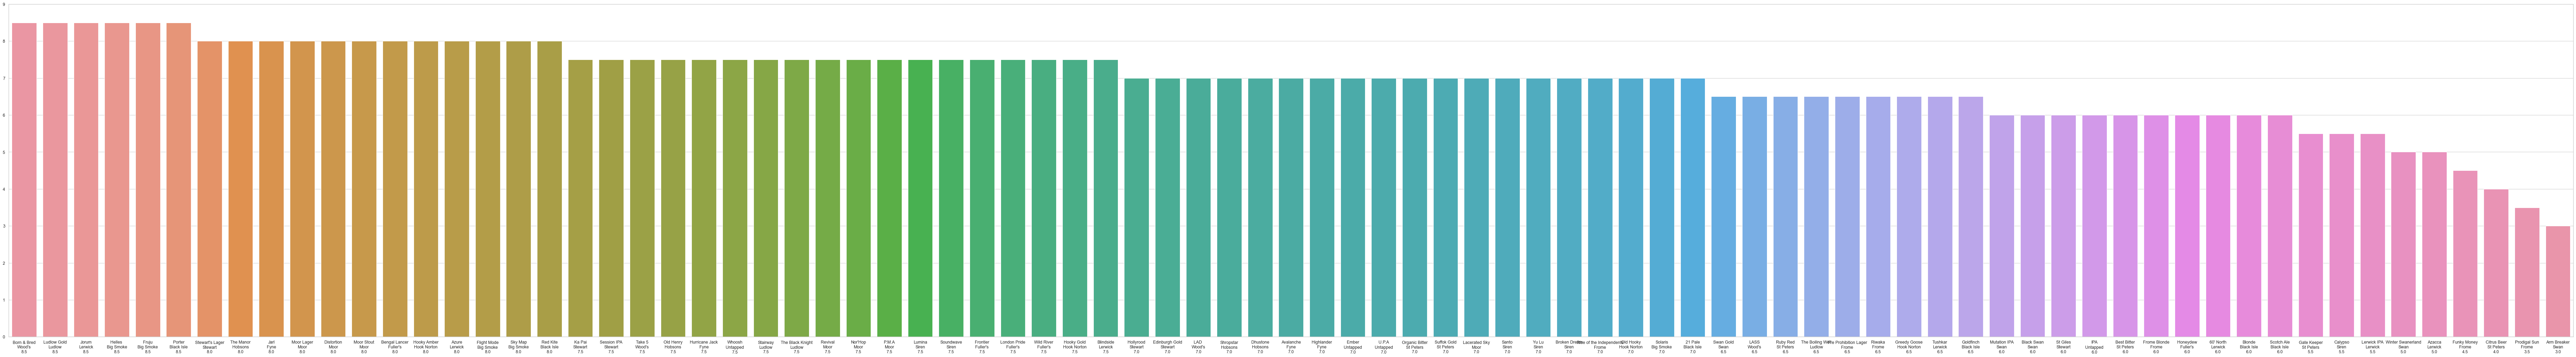

In [5]:
plt.figure(figsize=(120, 16), dpi=80)
plt.ylim(0, 9)
ax = sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()))

Brewery Order

In [6]:
dictionary = {}
for i, b in enumerate(df['Brewery'].unique()):
    key = str(b) + ' - ' + str(round(np.mean(df.loc[df['Brewery'] == b][Person]), 2))
    dictionary[key] = np.mean(df.loc[df['Brewery'] == b][Person])
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

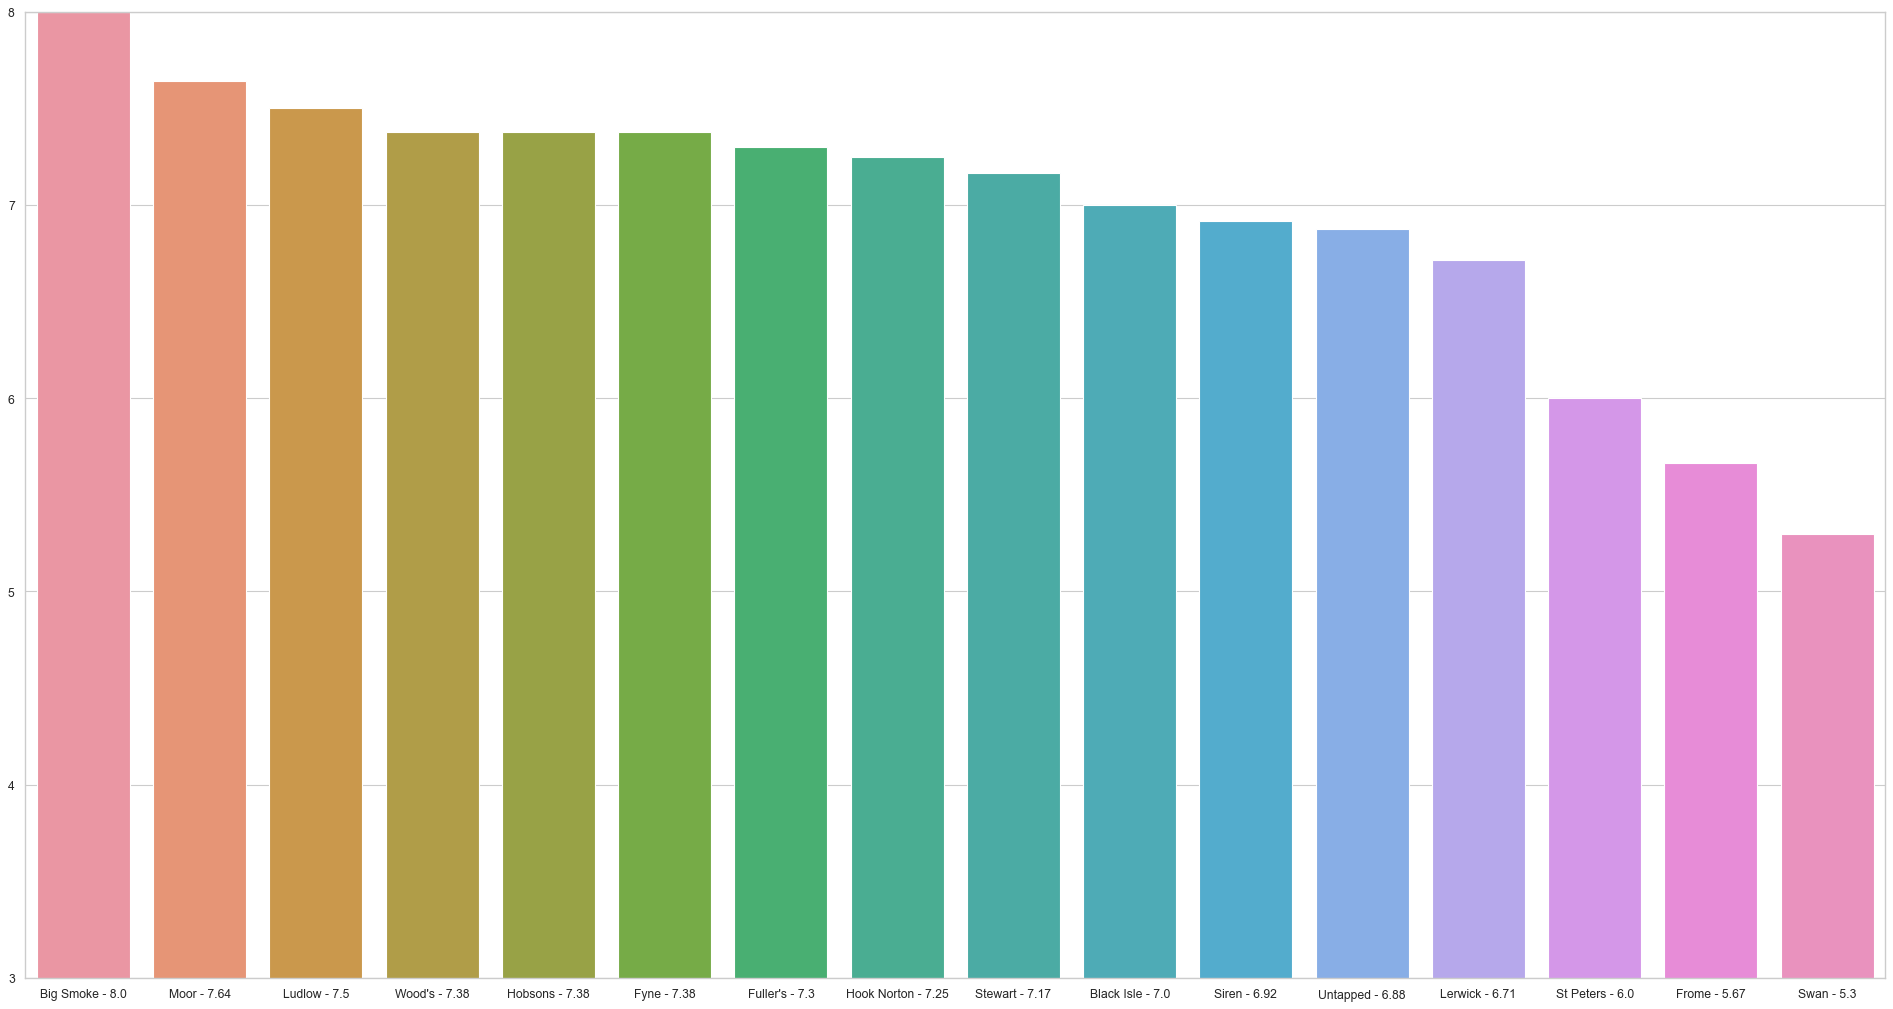

In [7]:
plt.figure(figsize=(30, 16), dpi=80)
plt.ylim(3, 8)
ax = sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()))

Style Order

In [10]:
dictionary = {}
for i, b in enumerate(df['Style'].unique()):
    key = str(b) + ' - ' + str(round(np.mean(df.loc[df['Style'] == b][Person]), 2))
    dictionary[key] = np.mean(df.loc[df['Style'] == b][Person])
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

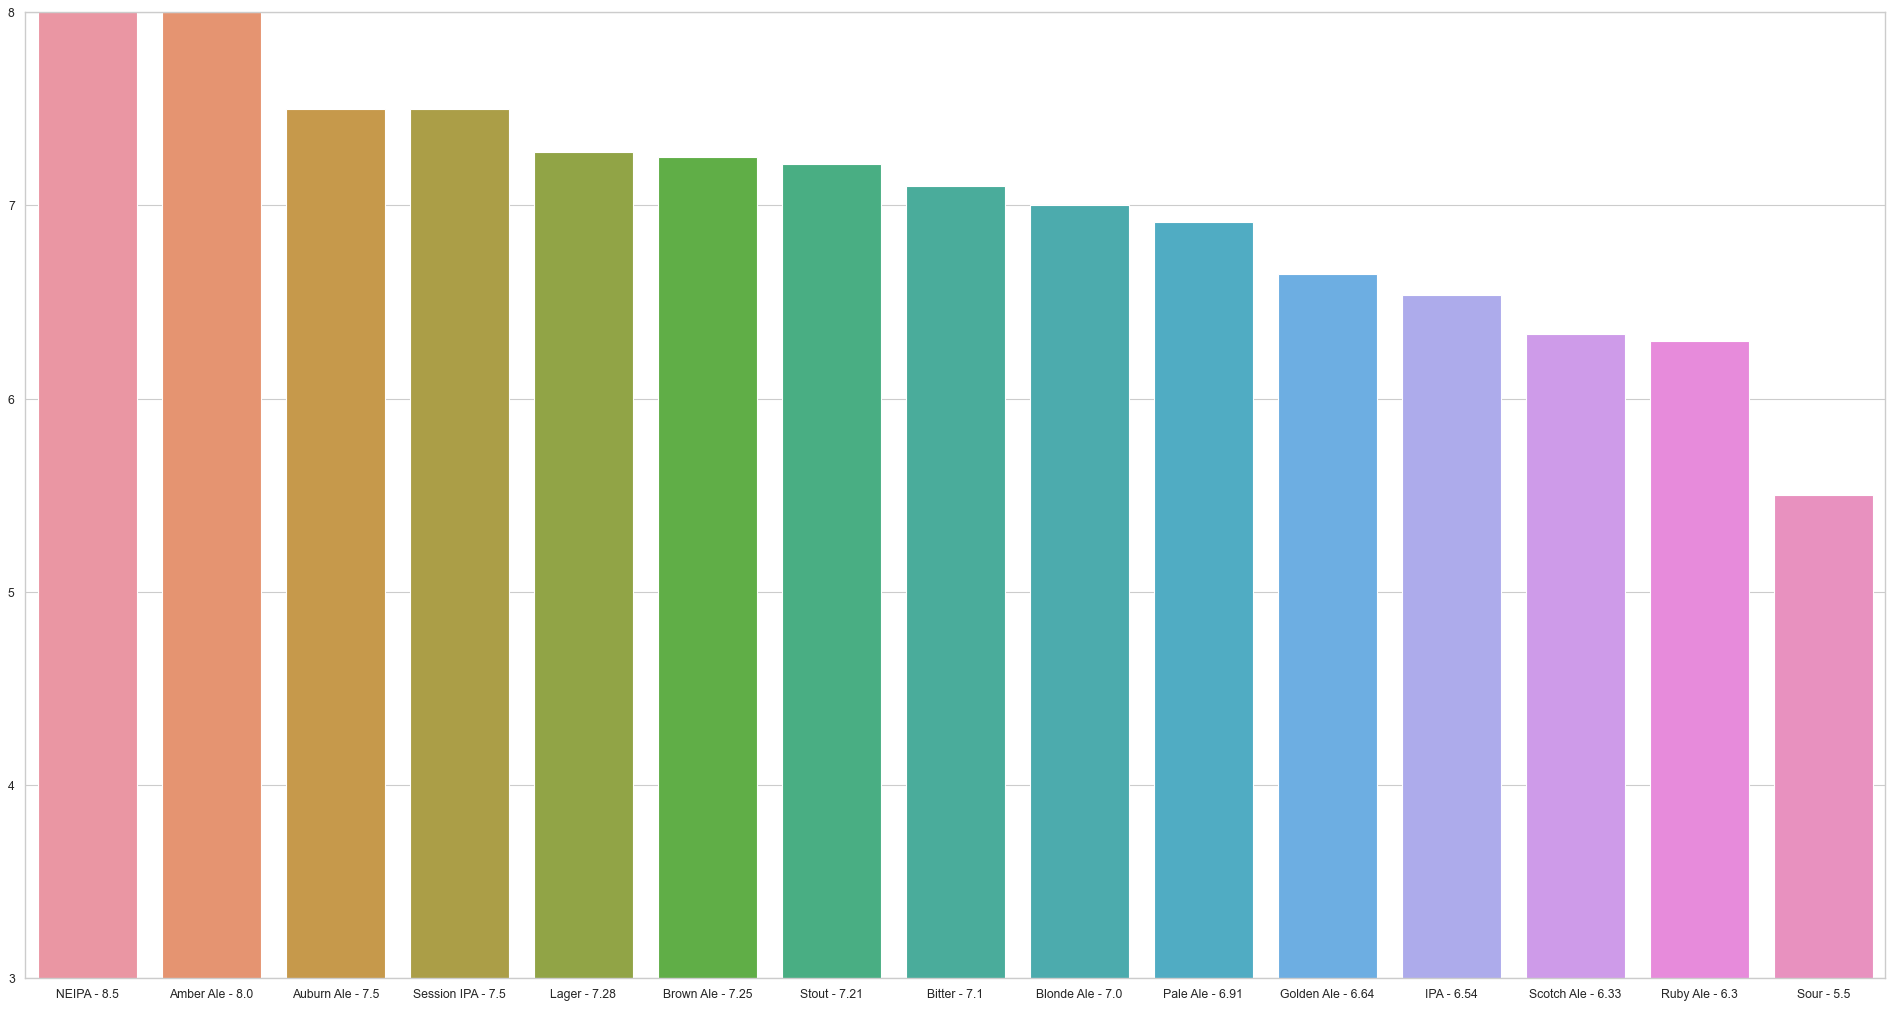

In [11]:
plt.figure(figsize=(30, 16), dpi=80)
plt.ylim(3, 8)
ax = sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()))

Hop Rating

In [47]:
hopsCount = {}; hopsTotal = {}; hopsAvg = {}
for index, row in df.iterrows():
    if type(row['Hops']) == str:
        for hop in row['Hops'].split(';'):
            hopsCount[hop] = hopsCount[hop] + 1 if hop in hopsCount.keys() else 1
            hopsTotal[hop] = hopsTotal[hop] + row[Person] if hop in hopsTotal.keys() else row[Person]
for k in hopsCount.keys():
    if hopsCount[k] >= 4:
        hopsAvg[k] = round(hopsTotal[k] / hopsCount[k], 2)
hopsAvg = dict(sorted(hopsAvg.items(), key=lambda item: item[1], reverse=True)); hopsAvg

{'Saaz': 0.8,
 'Fuggles': 0.8,
 'Chinook': 0.8,
 'Citra': 0.77,
 'Mosaic': 0.76,
 'Magnum': 0.74,
 'Cascade': 0.73,
 'Challenger': 0.72,
 'Simcoe': 0.7,
 'Goldings': 0.63,
 'First Gold': 0.58,
 'Amarillo': 0.56}

Similarity Rating

In [34]:
names = ['Adam', 'Dad', 'Alan', 'Dave', 'Fi']
for name in names:
    x = df[name].values.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df[name] = x_scaled

names.remove(Person)
dictionary = {}
p1 = df[Person].values.reshape(-1,1)
for i in range(np.shape(names)[0]):
    p2 = df[names[i]].values.reshape(-1,1)
    dictionary[Person+' And '+names[i]] = distance.euclidean(p1, p2)
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=False))
dictionary

{'Adam And Dave': 1.9227505550564008,
 'Adam And Fi': 2.138179787244757,
 'Adam And Alan': 2.2974293935139376,
 'Adam And Dad': 2.7835556071653786}

In [50]:
import os

os.system('jupyter nbconvert --to html GePersonReportpynb')

0